# **Week # 07**

## Logistic Regression: 
https://www.youtube.com/watch?v=p-ltr1C7u2o&list=PLkDaE6sCZn6FNC6YRfRQc_FbeQrF8BwGI&index=31 31 - 36



We will be focusing on classification problems in this week. 



Classification:
- Binary classification (T or F)

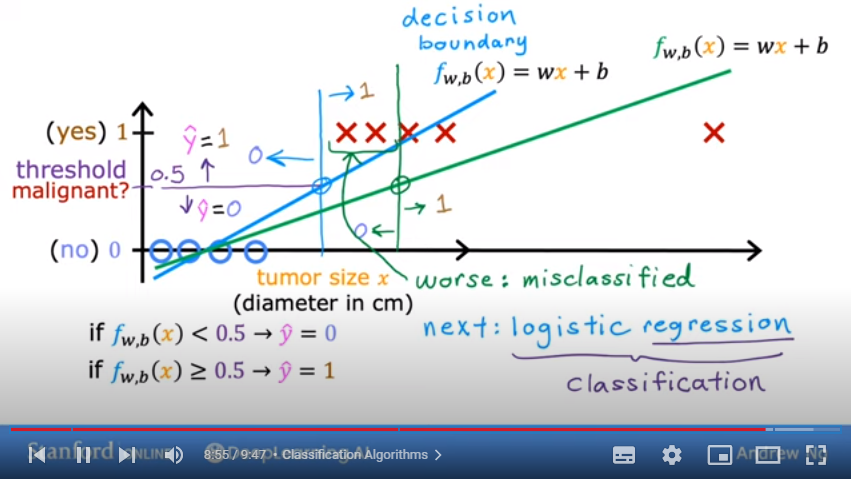

Sigmoid function / logistic function is used when we want outputs between 0 and 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('hearing_test.xlsx')

In [4]:
df.head()

,age,physical_score,test_result
0,33,40.7,1
1,50,37.2,1
2,52,24.7,0
3,56,31.0,0
4,35,42.9,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 117.3 KB


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

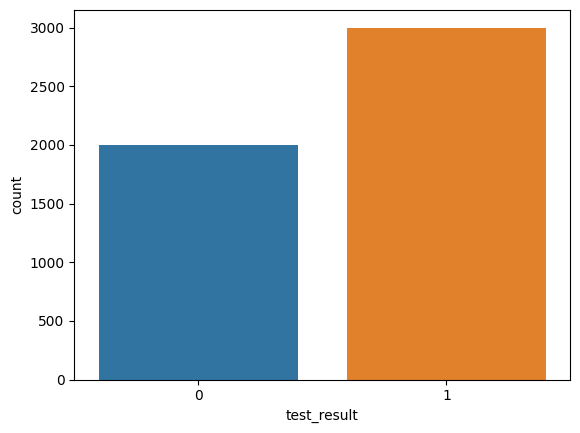

In [8]:
sns.countplot(data=df,x='test_result')
plt.show()

<Axes: xlabel='test_result', ylabel='age'>

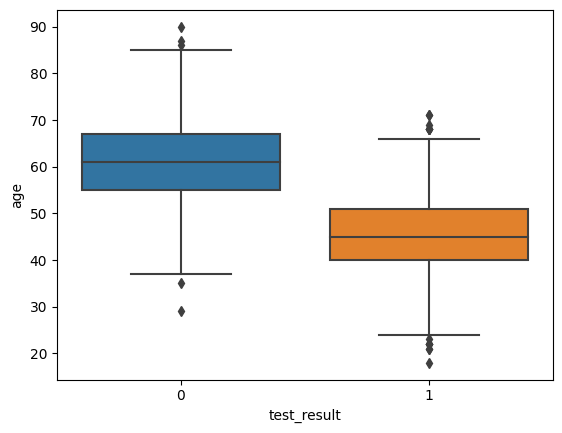

In [9]:
sns.boxplot(x='test_result',y='age',data=df)

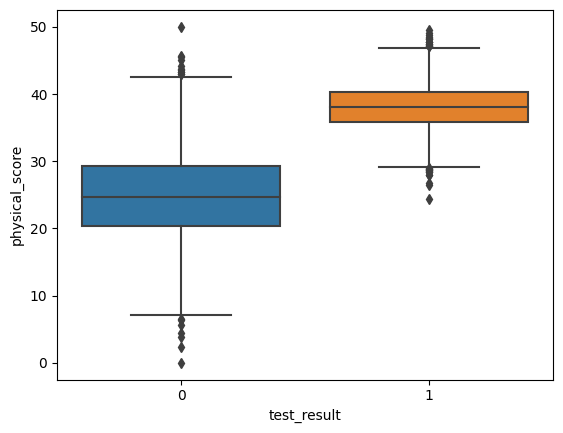

In [10]:
sns.boxplot(x='test_result',y='physical_score',data=df)
plt.show()

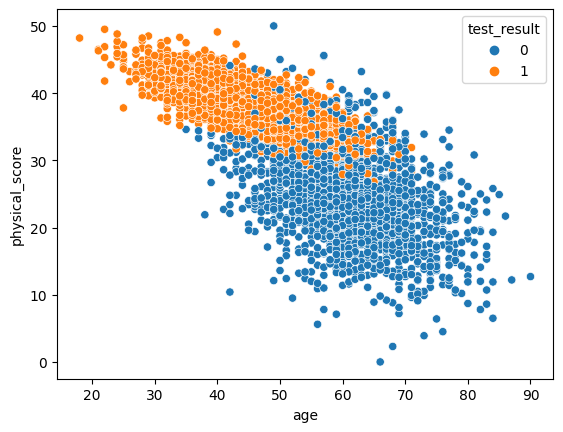

In [11]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')
plt.show()

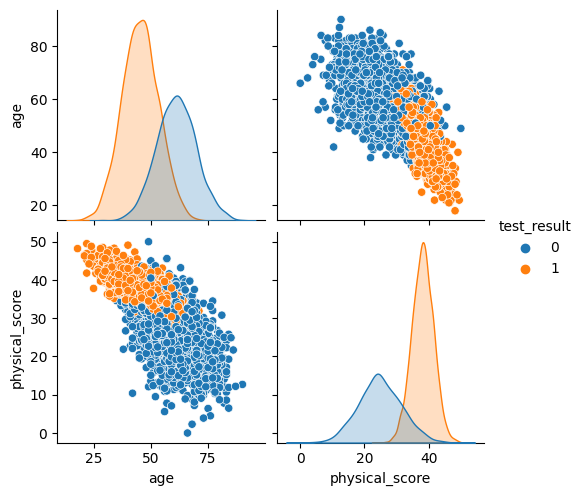

In [12]:
sns.pairplot(df,hue='test_result')
plt.show()

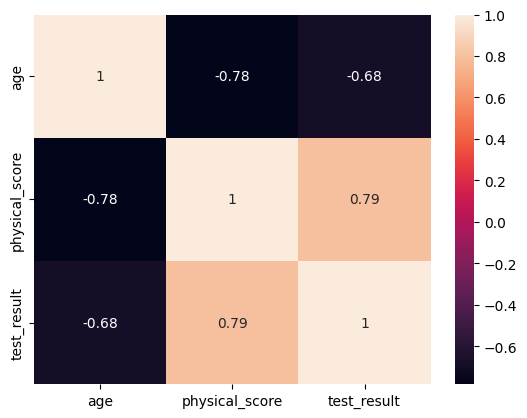

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [22]:
y_pred = log_model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
accuracy_score(y_test,y_pred)

0.93

In [26]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

